# Homework - Neural networks - Part B (20 points)
## Gradient descent for an artifical neuron

by *Brenden Lake* and *Todd Gureckis*  
Computational Cognitive Modeling  
NYU class webpage: https://brendenlake.github.io/CCM-site/  
email to course instructors: instructors-ccm-spring2019@nyuccl.org

<div class="alert alert-danger" role="alert">
This homework is due before midnight on Monday, Feb. 25, 2019.
</div>

This assignment implements the gradient descent algorithm for a simple artificial neuron. As covered in lecture, the neuron will learn to compute logical OR. The neuron model and logical OR are shown below, for inputs $x_0$ and $x_1$ and target output $y$.

<img src="images/nn_OR.jpeg" style="width: 350px;"/>

This assignment requires some basic PyTorch skill. You can review your notes from lab and also two basic [PyTorch tutorials](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), "What is PyTorch?" and "Autograd", which should have the basics you need.

In [16]:
# Import libraries
from __future__ import print_function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

Let's create `torch.tensor` objects for representing the data matrix `D` with targets `Y`. Each row of `D` is a different data point.

In [17]:
# Data
D = np.zeros((4,2),dtype=float)
D[0,:] = [0.,0.]
D[1,:] = [0.,1.]
D[2,:] = [1.,0.]
D[3,:] = [1.,1.]
D = torch.tensor(D,dtype=torch.float)
Y = torch.tensor([0.,1.,1.,1.])
N = D.shape[0] # number of input patterns

The artificial neuron operates as follows. Given an input vector $x$, the net input ($\textbf{net}$) to the neuron is computed as follows

$$ \textbf{net} = \sum_i x_i w_i + b,$$

for weights $w_i$ and bias $b$. The activation function $g(\textbf{net})$ is the logistic function

$$ g(\textbf{net}) = \frac{1}{1+e^{-\textbf{net}}},$$

which is used to compute the predicted output $\hat{y} = g(\textbf{net})$. Finally, the loss (squared error) for a particular pattern $x$ is defined as 

$$ E(w,b) = (\hat{y}-y)^2,$$

where the target output is $y$. **Your main task is to manually compute the gradients of the loss $E$ with respect to the neuron parameters:**

$$\frac{\partial E(w,b)}{\partial w}, \frac{\partial E(w,b)}{\partial b}.$$

By manually, we mean to program the gradient computation directly, using the formulas discussed in class. This is in contrast to using PyTorch's `autograd` (Automatric differentiation) that computes the gradient automatically, as discussed in class, lab, and in the PyTorch tutorial (e.g., `loss.backward()`). First, let's write the activation function and the loss in PyTorch. 

In [18]:
def g_logistic(net):
    return 1. / (1.+torch.exp(-net))

def loss(yhat,y):
    return (yhat-y)**2

Next, we'll also write two functions for examining the internal operations of the neuron, and the gradients of its parameters.

In [21]:
def print_forward(x,yhat,y):
    # Examine network's prediction for input x
    print(' Input: ',end='')
    print(x.numpy())
    print(' Output: ' + str(round(yhat.item(),3)))
    print(' Target: ' + str(y.item()))

def print_grad(grad_w,grad_b):
    # Examine gradients
    print('  d_loss / d_w = ',end='')
    print(grad_w)
    print('  d_loss / d_b = ',end='')
    print(grad_b)

Now let's dive in and begin the implementation of stochastic gradient descent. We'll initialize our parameters $w$ and $b$ randomly, and proceed through a series of epochs of training. Each epoch involves visiting the four training patterns in random order, and updating the parameters after each presentation of an input pattern.



<div class="alert alert-success" role="alert">
<h3> Problem 1 (10 points) </h3>
<br>
In the code below, fill in code to manually compute the gradient in closed form.
    <ul>
        <li>See lecture slides for the equation for the gradient for the weights w.</li>
        <li>Derive (or reason) to get the equation for the gradient for bias b.</li>
    </ul>
</div>

<div class="alert alert-success" role="alert">
<h3> Problem 2 (5 points) </h3>
<br>
In the code below, fill in code for the weight and bias update rule for gradient descent.
</div>

After completing the code, run it to compare **your gradients** with the **ground-truth computed by PyTorch.** Also, you can check the neuron's performance at the end of training.

Compute the gradient manually
 Input: [1. 0.]
 Output: 0.751
 Target: 1.0
  d_loss / d_w = [-0.09310137 -0.        ]
  d_loss / d_b = [-0.09310137]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.09310135 -0.        ]
  d_loss / d_b = [-0.09310135]

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.655
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.29602957]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.2960296]

Compute the gradient manually
 Input: [1. 1.]
 Output: 0.873
 Target: 1.0
  d_loss / d_w = [-0.02836126 -0.02836126]
  d_loss / d_b = [-0.02836126]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.02836127 -0.02836127]
  d_loss / d_b = [-0.02836127]

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.811
 Target: 1.0
  d_loss / d_w = [-0.         -0.05814445]
  d_loss / d_b = [-0.05814445]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [ 0.         -0.0

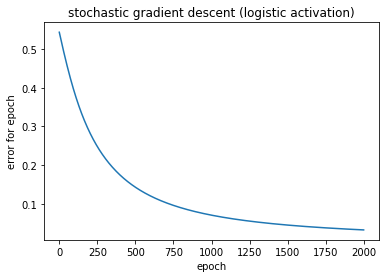

In [23]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.rand(2,requires_grad=True) # [size 2] tensor
b = torch.rand(1,requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 2000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x = D[p,:] # input pattern
        
        # compute output of neuron
        net = torch.dot(x,w)+b
        yhat = g_logistic(net)
        
        # compute loss
        y = Y[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # print output if this is the last epoch
        if (e == nepochs-1):
            print("Final result:")
            print_forward(x,yhat,y)
            print("")

        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x,yhat,y)
        with torch.no_grad():
            w_grad = 2*(yhat-y)*yhat*(1-yhat)*x  # added
            b_grad = 2*(yhat-y)*yhat*(1-yhat)    # added
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            #    w_grad = ...    ([size 2] PyTorch tensor)
            #    b_grad = ...    ([size 1] PyTorch tensor)
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the gradient computation, which we don't want.
            #raise Exception('Replace with your code.')                      
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            w -= alpha*w_grad   #added
            b -= alpha*b_grad   #added
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            #    w -=   ....
            #    b -=   ....
            #raise Exception('Replace with your code.')
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (logistic activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

Now let's change the activation function to "tanh" from the "logistic" function, such that $g(\textbf{net}) = \tanh(\textbf{net})$. Here is an implementation of tanh.

In [26]:
def g_tanh(x):
    return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

The derivative of the tanh function is as follows:

$$\frac{\partial g(\textbf{net})}{\partial \textbf{net}}= \frac{\partial \tanh(\textbf{net})}{\partial \textbf{net}} = 1.0 - (\tanh(\textbf{net}))^2$$

<div class="alert alert-success" role="alert">
<h3> Problem 3 (5 points) </h3>
<br>
Just as before, fill in the missing code fragments for implementing gradient descent. This time we are using the tanh activation function. Be sure to change your gradient calculation to reflect the new activation function.
</div>

Compute the gradient manually
 Input: [1. 1.]
 Output: 0.593
 Target: 1.0
  d_loss / d_w = [-0.19673237 -0.19673237]
  d_loss / d_b = [-0.528731]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.528731 -0.528731]
  d_loss / d_b = [-0.528731]

Compute the gradient manually
 Input: [1. 0.]
 Output: 0.534
 Target: 1.0
  d_loss / d_w = [-0.23170803 -0.        ]
  d_loss / d_b = [-0.6653079]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.6653079  0.       ]
  d_loss / d_b = [-0.6653079]

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.523
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.7598301]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.7598301]

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.587
 Target: 1.0
  d_loss / d_w = [-0.        -0.1999859]
  d_loss / d_b = [-0.5404356]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [ 0.        -0.5404357]
  d_loss 

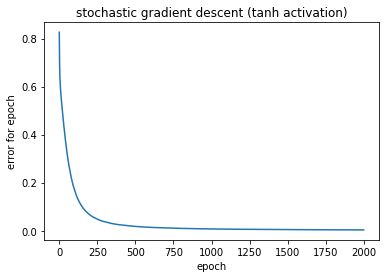

In [27]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.rand(2,requires_grad=True) # [size 2] tensor
b = torch.rand(1,requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 2000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x = D[p,:] # input pattern
        
        # compute output of neuron
        net = torch.dot(x,w)+b
        yhat = g_tanh(net)
        
        # compute loss
        y = Y[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # print output if this is the last epoch
        if (e == nepochs-1):
            print("Final result:")
            print_forward(x,yhat,y)
            print("")

        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x,yhat,y)
        with torch.no_grad():
            w_grad = 2*(yhat-y)*yhat*(1-yhat)*x  # added
            b_grad = 2*(yhat-y)*(1-yhat**2)    # added
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            #    w_grad = ...    ([size 2] PyTorch tensor)
            #    b_grad = ...    ([size 1] PyTorch tensor)
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the graident computation, which we don't want.
            #raise Exception('Replace with your code.')                       
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            w -= alpha*w_grad   #added
            b -= alpha*b_grad   #added
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            #    w -=   ....
            #    b -=   ....
            #raise Exception('Replace with your code.')
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (tanh activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

## Turning in homework

When you are finished with this notebook. Save your work in order to turn it in.  To do this select *File*->*Download As...*->*HTML*.

<img src="images/save-pdf.png" width="300">

You can turn in your assignments using NYU Classes webpage for the course (available on https://home.nyu.edu). **Make sure you complete all parts (A-E) of this homework.**